In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from polynomial_regression_lib import *


file_path = r"C:\Users\Aditya Jain\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\WOC\Polynomial_regression\polynomial_regression_train.csv"

df = pd.read_csv(file_path)

print(df.head())
df.shape

   ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5        Target
0   1  -0.299150   0.980381  -1.244780   0.420551  -0.352235  8.168743e-10
1   2  -0.374319  -1.179867   0.615588   0.054701   0.687182 -5.081225e-10
2   3  -1.240429  -0.139086  -0.001653   0.487685  -0.242808  4.560170e-10
3   4  -0.429881  -1.724246  -0.098046   0.896504   0.318585 -2.647546e-09
4   5  -1.726345   1.945823   1.275979  -0.474670   1.050494 -1.704606e-08


(48000, 7)

TRAINING

In [2]:
df.head(10)

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1,-0.299150,0.980381,-1.244780,0.420551,-0.352235,8.168743e-10
1,2,-0.374319,-1.179867,0.615588,0.054701,0.687182,-5.081225e-10
2,3,-1.240429,-0.139086,-0.001653,0.487685,-0.242808,4.560170e-10
3,4,-0.429881,-1.724246,-0.098046,0.896504,0.318585,-2.647546e-09
4,5,-1.726345,1.945823,1.275979,-0.474670,1.050494,-1.704606e-08
5,6,0.719335,-0.958623,0.327252,-0.578998,-1.306745,-3.458655e-10
6,7,0.252856,-0.690294,0.737798,-1.752012,-1.811167,-7.451065e-09
7,8,0.324350,-0.514596,-1.864251,-0.019060,-0.026929,3.512555e-09
8,9,-0.632990,-0.959605,-1.719171,1.408667,-1.114809,-1.301514e-09
9,10,-1.078015,0.524848,0.079212,-1.729532,-1.358179,-9.762635e-09


In [3]:
data = df.to_numpy()

In [4]:
# load the dataset
x_train = np.delete(data, (0,6), axis=1)
y_train = data[:,6]

DEGREE 3

In [5]:
x_train

array([[-2.99150217e-01,  9.80381374e-01, -1.24478036e+00,
         4.20551444e-01, -3.52234517e-01],
       [-3.74319425e-01, -1.17986704e+00,  6.15588148e-01,
         5.47011163e-02,  6.87182229e-01],
       [-1.24042933e+00, -1.39085810e-01, -1.65302067e-03,
         4.87685105e-01, -2.42808052e-01],
       ...,
       [-1.67753838e+00,  1.75827436e+00,  1.02053447e+00,
         3.46495673e-01,  1.31375468e+00],
       [ 1.31334466e+00,  3.15358042e-01, -6.06291322e-02,
         7.03251230e-01, -6.18519654e-01],
       [-9.99869575e-01, -1.65745830e+00, -8.12632269e-01,
         1.01871706e+00, -1.23699276e+00]])

In [6]:
x_train_d3 = x_train    #polynomial_terms(x_train, degree=1)

In [7]:
x_train_d3.shape

(48000, 5)

In [8]:
print ('The shape of x_train is:', x_train_d3.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train_d3))

The shape of x_train is: (48000, 5)
The shape of y_train is:  (48000,)
Number of training examples (m): 48000


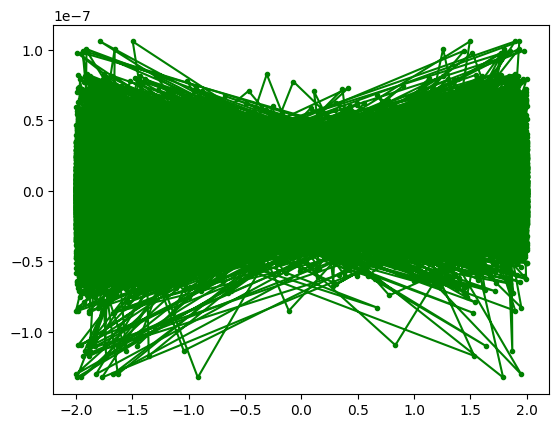

In [9]:
#rough 
plt.plot(x_train_d3,y_train,'g.-')
plt.show()

In [10]:
# normalize the original features
x_norm_d3 , mean_train_d3 , sigma_train_d3 =z_score_normalization_train(x_train_d3)
print(f"mean_train_d3 = {mean_train_d3}, \nsigma = {sigma_train_d3}")
print(f"Peak to Peak range by column in Raw_x:{np.ptp(x_train_d3,axis=0)}")   
print(f"Peak to Peak range by column in Normalized_x:{np.ptp(x_norm_d3,axis=0)}")

mean_train_d3 = [ 0.01462423 -0.00111497  0.00248453  0.00069082 -0.00512095], 
sigma = [1.15587174 1.15385438 1.15396609 1.15495499 1.15242664]
Peak to Peak range by column in Raw_x:[3.99950485 3.9998794  3.99993517 3.99966558 3.9997406 ]
Peak to Peak range by column in Normalized_x:[3.4601632  3.46653743 3.46625019 3.46304886 3.47071168]


In [11]:
print(f"mean_train_d3 = {mean_train_d3.shape}, \nsigma = {sigma_train_d3.shape}")

mean_train_d3 = (5,), 
sigma = (5,)


In [12]:
np.random.seed(1)
w_d3 = np.random.rand(x_train_d3.shape[1])
b_d3 = np.random.rand()

In [13]:
w_d3.shape

(5,)

In [14]:

# w = w.reshape(25,1)     # converting into 2D array
b_d3 = np.array(b_d3)

In [15]:

print(f"w_d3: {w_d3}")
print(f"b_d3: {b_d3}")


w_d3: [4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
b_d3: 0.0923385947687978


In [16]:
compute_cost(x_norm_d3,y_train,w_d3,b_d3)

np.float64(0.40862228256134925)

In [17]:
compute_gradient(x_norm_d3,y_train,w_d3,b_d3)

(array([ 0.4180444 ,  0.72207097, -0.00209225,  0.3060061 ,  0.14816211]),
 np.float64(0.0923385950957536))

In [18]:
dj_dw3, dj_db3 = compute_gradient(x_norm_d3,y_train,w_d3,b_d3)

In [19]:
dj_dw3.shape

(5,)

In [20]:
b_d3.shape

()

In [21]:
dj_db3.shape

()

In [22]:
iterations = 10000
alpha = 0.01

w_d3,b_d3, J_history_d3,_ = gradient_descent(x_norm_d3,y_train,w_d3,b_d3, compute_cost, compute_gradient, alpha, iterations)

Iteration 0: Cost 0.40
Iteration 1000: Cost 0.00
Iteration 2000: Cost 0.00
Iteration 3000: Cost 0.00
Iteration 4000: Cost 0.00
Iteration 5000: Cost 0.00
Iteration 6000: Cost 0.00
Iteration 7000: Cost 0.00
Iteration 8000: Cost 0.00
Iteration 9000: Cost 0.00
Iteration 9999: Cost 0.00


TESTING

In [23]:
file_path = r"C:\Users\Aditya Jain\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\WOC\Polynomial_regression\polynomial_regression_test.csv"
df = pd.read_csv(file_path)

print(df.head())
df.shape

   ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   1   1.718004  -0.201814   0.791965  -0.410485   1.678171
1   2   0.782395   0.897345  -0.059263  -1.725306  -1.363520
2   3   0.619033   0.397670  -0.506356  -0.546682  -1.629186
3   4   1.950046  -1.874789  -0.144491   1.952435   1.908823
4   5   0.097417   0.960511  -1.031956  -1.585839  -1.297509


(12000, 6)

In [24]:
df.head(10)

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,1,1.718004,-0.201814,0.791965,-0.410485,1.678171
1,2,0.782395,0.897345,-0.059263,-1.725306,-1.363520
2,3,0.619033,0.397670,-0.506356,-0.546682,-1.629186
3,4,1.950046,-1.874789,-0.144491,1.952435,1.908823
4,5,0.097417,0.960511,-1.031956,-1.585839,-1.297509
5,6,1.629072,-0.142205,-1.753674,0.290013,-1.624790
6,7,-0.674945,-0.590210,1.164653,0.053788,1.728475
7,8,1.888828,1.108166,1.548626,-0.034194,-0.618244
8,9,-1.667730,0.904480,1.375469,-0.376666,-0.572693
9,10,0.382029,-1.659712,0.897024,-1.793539,0.102284


In [25]:
data = df.to_numpy()

In [26]:
# load the dataset
x_test = np.delete(data, (0), axis=1)
print ('The shape of x_test is:', x_test.shape)
print ('Number of testing examples (m):', len(x_test))

The shape of x_test is: (12000, 5)
Number of testing examples (m): 12000


In [27]:
x_test_d3 = polynomial_terms(x_test, degree=3)   

In [28]:
#normalize the original features
print(f"mean_train = {mean_train_d3}, \nsigma = {sigma_train_d3}")
x_norm =z_score_normalization_test(x_test_d3,mean_train_d3,sigma_train_d3)
print(f"Peak to Peak range by column in Raw_x:{np.ptp(x_test_d3,axis=0)}")   
print(f"Peak to Peak range by column in Normalized_x:{np.ptp(x_norm,axis=0)}")

mean_train = [ 0.01462423 -0.00111497  0.00248453  0.00069082 -0.00512095], 
sigma = [1.15587174 1.15385438 1.15396609 1.15495499 1.15242664]


ValueError: operands could not be broadcast together with shapes (12000,55) (5,) 

In [31]:
x_trail_d3 = x_norm[(1,2,4),:]

In [ ]:
predictor(x_trail_d3, w_d3, b_d3)